<a href="https://colab.research.google.com/github/jmerceron/AI-Activity/blob/main/Julien_MLP_Digits_Recognition_16x16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import plot_model

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


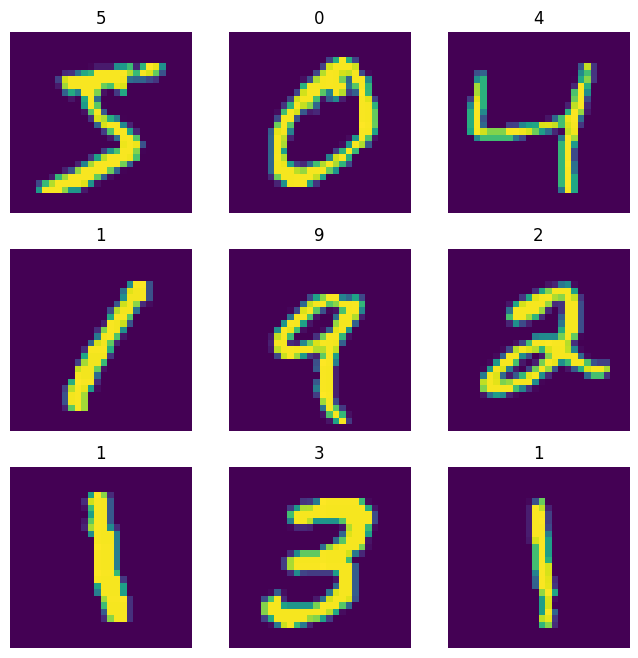

In [5]:
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis =0)
x_test = tf.keras.utils.normalize(x_test, axis =0)

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13002 (50.79 KB)
Trainable params: 13002 (50.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


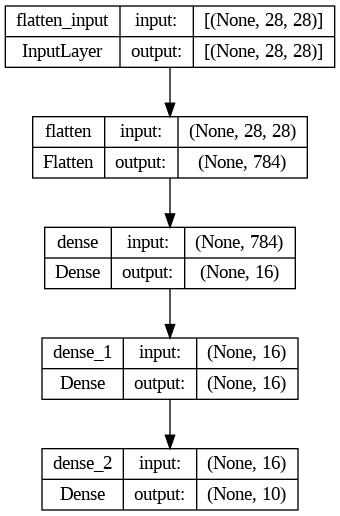

In [9]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics =['accuracy'])

In [11]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs = 15)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 12s 5ms/step - loss: 1.1502 - accuracy: 0.6493 - val_loss: 0.7998 - val_accuracy: 0.7801
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5648 - accuracy: 0.8321 - val_loss: 0.6910 - val_accuracy: 0.8319
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4564 - accuracy: 0.8657 - val_loss: 0.6621 - val_accuracy: 0.8461
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3858 - accuracy: 0.8883 - val_loss: 0.5801 - val_accuracy: 0.8693
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3356 - accuracy: 0.9036 - val_loss: 0.5256 - val_accuracy: 0.8821
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3036 - accuracy: 0.9121 - val_loss: 0.5008 - val_accuracy: 0.8931
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2841 - accuracy: 0.9178 - val_loss: 0.4738 - val_accuracy: 0.9008
Ep

In [12]:
{layer.name: layer.get_weights() for layer in model.layers}

{'flatten': [],
 'dense': [array([[ 0.0162668 ,  0.03058963, -0.06468784, ..., -0.06870538,
           0.0218804 , -0.03457342],
         [ 0.07421759,  0.05263254, -0.0410534 , ..., -0.07976393,
          -0.05124709, -0.04284097],
         [-0.00113015, -0.05744188,  0.06733198, ..., -0.02182895,
          -0.0598293 ,  0.08648893],
         ...,
         [-0.04876927, -0.03389257, -0.0162816 , ..., -0.05383884,
           0.01972526, -0.04820038],
         [ 0.04465882, -0.06910752,  0.00117283, ..., -0.02244427,
          -0.02184474, -0.02969358],
         [ 0.06998035, -0.0458209 ,  0.07212129, ...,  0.08213325,
           0.00218849,  0.08243681]], dtype=float32),
  array([ 0.13165985, -0.02077217,  0.01260255,  0.0901023 ,  0.08212657,
          0.12155719,  0.15224493,  0.30198476,  0.12615491,  0.1559263 ,
          0.06879529,  0.28085482,  0.23258929,  0.00076461,  0.14184351,
          0.20937161], dtype=float32)],
 'dense_1': [array([[-1.53833792e-01, -3.05710882e-01,  4.

In [13]:
weights1, biases1 = model.layers[1].get_weights()
print(weights1)

[[ 0.0162668   0.03058963 -0.06468784 ... -0.06870538  0.0218804
  -0.03457342]
 [ 0.07421759  0.05263254 -0.0410534  ... -0.07976393 -0.05124709
  -0.04284097]
 [-0.00113015 -0.05744188  0.06733198 ... -0.02182895 -0.0598293
   0.08648893]
 ...
 [-0.04876927 -0.03389257 -0.0162816  ... -0.05383884  0.01972526
  -0.04820038]
 [ 0.04465882 -0.06910752  0.00117283 ... -0.02244427 -0.02184474
  -0.02969358]
 [ 0.06998035 -0.0458209   0.07212129 ...  0.08213325  0.00218849
   0.08243681]]


In [14]:
# cannot easily visualize filters lower down
from matplotlib import pyplot
# normalize weights values to 0-1 so we can visualize them
f_min, f_max = weights1.min(), weights1.max()
weights1 = (weights1 - f_min) / (f_max - f_min)
print(weights1)

[[0.4738781  0.47591552 0.4623622  ... 0.4617907  0.4746766  0.46664602]
 [0.48212165 0.47905114 0.46572423 ... 0.4602176  0.46427414 0.46546993]
 [0.47140336 0.4633929  0.48114216 ... 0.46845892 0.46305335 0.48386726]
 ...
 [0.46462664 0.46674284 0.46924803 ... 0.46390548 0.47437006 0.46470755]
 [0.4779169  0.4617335  0.47173095 ... 0.4683714  0.46845666 0.46734017]
 [0.4815189  0.46504602 0.48182347 ... 0.48324767 0.47187543 0.48329085]]


(784, 16)


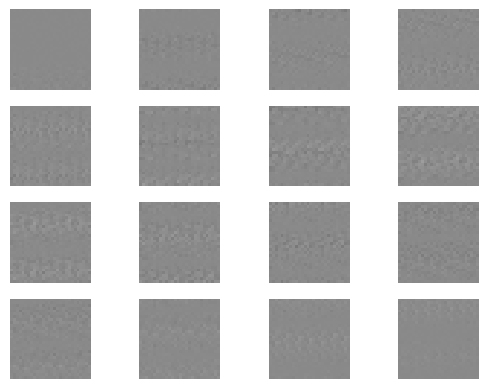

In [15]:
# Get the weights from the first Hidden layer
print(weights1.shape)

# Check if the shape is compatible for reshaping
if weights1.shape != (28 * 28, 16):
    print("The shape of the weights array is not compatible for reshaping.")

# Reshape weights into 16 images of 28 by 28
weights1_images = weights1.reshape(-1, 28, 28)

# Plot the weights
fig, axes = plt.subplots(4, 4)
for i, ax in enumerate(axes.flat):
#    ax.matshow(weights1_images[i], cmap='viridis')
    ax.matshow(weights1_images[i], cmap=plt.cm.gray, vmin=f_min, vmax=f_max)
    ax.axis('off')

plt.show()

(16, 16)


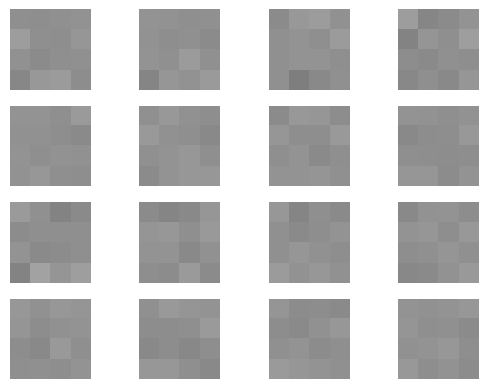

In [16]:
# Get the weights from the first Hidden layer
weights2, biases2 = model.layers[2].get_weights()
print(weights2.shape)

# normalize weights values to 0-1 so we can visualize them
f_min, f_max = weights2.min(), weights2.max()
weights2 = (weights2 - f_min) / (f_max - f_min)

# Check if the shape is compatible for reshaping
if weights2.shape != (4 * 4, 16):
    print("The shape of the weights array is not compatible for reshaping.")

# Reshape weights into 16 images of 28 by 28
weights2_images = weights2.reshape(-1, 4, 4)

# Plot the weights
fig, axes = plt.subplots(4, 4)
for i, ax in enumerate(axes.flat):
#    ax.matshow(weights2_images[i], cmap='viridis')
    ax.matshow(weights2_images[i], cmap=plt.cm.gray, vmin=f_min, vmax=f_max)
    ax.axis('off')

plt.show()

***... now you have to put your 10 digit images in content folder...***
these images have to be labelled digit_x.png, in an 28x28 resolution

In [17]:
import cv2

In [19]:
image = cv2.imread('digit_3.png')[:,:,0]
image = np.invert(np.array([image]))

1/1 [==============================] - 0s 106ms/step
3


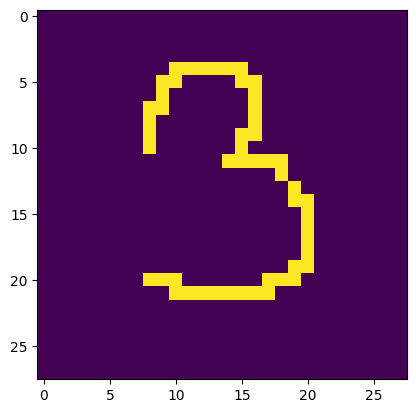

In [20]:
output = model.predict(image)
plt.imshow(image[0])
print(np.argmax(output))

In [21]:
model.save('/content/hand_written_Digit_recog_model.keras')

In [22]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [23]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.456s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [24]:
!streamlit run /content/julien_web_app.py &> /content/logs.txt &

In [25]:
!npx localtunnel --port 8501

npx: installed 22 in 2.399s
your url is: https://two-paws-own.loca.lt
^C
